# Stellar Luminosity Analysis

Exploring the relationship between stellar temperature, radius, and brightness using data science techniques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("C:\\Users\\MAHASHREE AJMERI\\Desktop\\Kaggle Datasets\\star_dataset.csv")
df.head()

,Name,Distance (ly),Luminosity (L/Lo),Radius (R/Ro),Temperature (K),Spectral Class
0,Altair,16.594171,9.979192,1.632650,7509.294247,A7V
1,Deneb,2600.490723,196002.627856,202.970526,8503.284796,A2Ia
2,Barnard's Star,6.052616,4.893716,0.222711,3165.959639,M4Ve
3,Polaris,322.601002,2196.241934,37.546813,6048.326915,F7Ib
4,Barnard's Star,5.902392,-1.496486,0.192359,3130.602069,M4Ve


### Data Cleaning and Preparation

In [ ]:
missing=df.isnull().sum()
if missing.any():
    df=df.dropna()

df = df.rename(columns={
    'Luminosity (L/Lo)': 'Luminosity',
    'Temperature (K)': 'Temperature',
    'Radius (R/Ro)': 'Radius',
    'Distance (ly)': 'Distance',
    'Spectral Class': 'Spectral_Class'
})

df = df[df['Luminosity'] > 0]


### Radius vs Luminosity Analysis


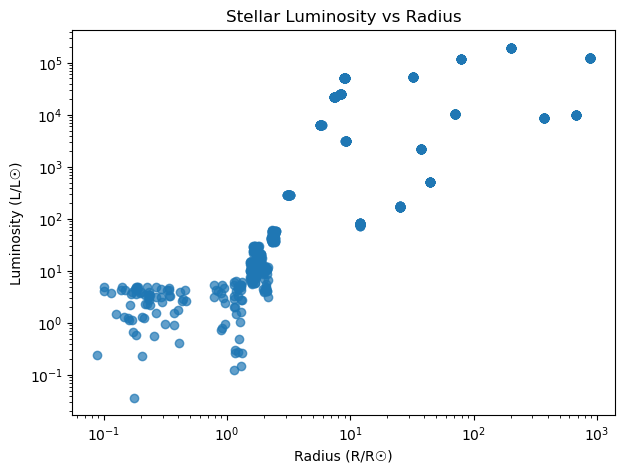

In [4]:
plt.figure(figsize=(7,5))
plt.scatter(df['Radius'], df['Luminosity'], alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Radius (R/R☉)")
plt.ylabel("Luminosity (L/L☉)")
plt.title("Stellar Luminosity vs Radius")
plt.show()


### Interpretation

The log-log scatter plot shows a positive relationship between stellar radius and luminosity. Stars with smaller radius generally have lower luminosities, whereas larger stars are significantly brighter. This relationship resonates with physics, where larger surface area results in higer total energy.

### Temperature vs Luminosity Analysis

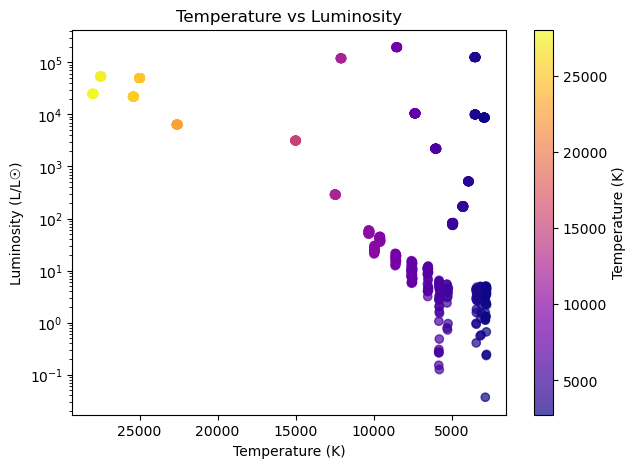

In [11]:
df=df[(df['Temperature']>0) & (df['Luminosity']>0)]

plt.figure(figsize=(7,5))

scatter=plt.scatter(
    df['Temperature'],
    df['Luminosity'],
    c=df['Temperature'],
    cmap='plasma',
    alpha=0.7
)

plt.yscale('log')
plt.gca().invert_xaxis()
plt.xlabel("Temperature (K)")
plt.ylabel("Luminosity (L/L☉)")
plt.title("Temperature vs Luminosity")

cbar=plt.colorbar(scatter)
cbar.set_label("Temperature (K)")

plt.show()

### Interpretation

The Hertzsprung-Russell inspired diagram illustrates the relationship between stellar temperature and luminosity in the dataset. A general positive trend is observed, where hotter stars tend to have higher luminosities. The spread of data points highlights the diversity of stars in the dataset, with varying stellar size and spectral class.

### Correlation Analysis

In [12]:
corr=df['Radius'].corr(np.log10(df['Luminosity']))
print(f"Correlation between Radius and Luminosity:{corr:.3f}")

corr=df['Temperature'].corr(np.log10(df['Luminosity']))
print(f"Correlation between Temperature and Luminosity:{corr:.3f}")

Correlation between Radius and Luminosity:0.461
Correlation between Temperature and Luminosity:0.480


### Interpretation

The correlation coefficients 0.461 and 0.480 both indicate moderate positive relationships between Radius & Luminosity and Temperature & Luminosity respectively. 
With higher correlation coefficient, Temperature has a slightly stronger influence on Luminosity.